# Supervised Learning


## I've been in the healthcare field for more than 13 years and have seen many flu outbreaks in my career. Improving how we track and predict the flu should be something we can do with the use of social media, and in real time. It is advantageous to see the flu tweets in real time because it gives public health departments a faster way of recognizing and responding to the outbreaks, thereby educating the community and enabling a rapid response in health care settings as well. 

## The goal of this project is to predict the positive flu tweets from twitter using supervised and unsupervised methods and employing various NLP techniques.

## In this section, we analyze our tweets using supervised learning methods. I have manully labeled the data to detect which tweets are indicative of flu and which tweets are not. It is worth noting that a tweet is only labeled positive for the flu, if the user himself indicated that he has the flu, in other words, no third party flu. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import preprocessor as p
from nltk.corpus import stopwords

#visualizations
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS
import re
import string
import itertools
#from mpl_toolkits.basemap import Basemap

#machine learning
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [2]:
df7= pd.read_csv('df_stream7.csv') 
df8=pd.read_csv('df_stream8.csv') 
df9=pd.read_csv('df_stream9.csv') 
df10=pd.read_csv('df_stream10.csv') 
df11=pd.read_csv('df_stream11.csv')
df13=pd.read_csv('df_stream13.csv') 
df14=pd.read_csv('df_stream14.csv')
df16=pd.read_csv('df_stream16.csv') 
df19=pd.read_csv('df_stream19_pos.csv')
df20=pd.read_csv('df_stream20_pos.csv') 
df21=pd.read_csv('df_stream21.csv')
df22=pd.read_csv('df_stream22.csv')
df23=pd.read_csv('df_stream23.csv')

In [3]:
all= pd.concat(([df7,df8,df9,df10,df11,df13,df14,df16,df19,df20, df21, df22,df23]), sort=False)
#saving data
all.to_csv('all.csv')

In [4]:
all.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
all.label.value_counts()

0    3553
1     912
Name: label, dtype: int64

In [6]:
all.head()

,created_at,id,id_str,text,label,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,extended_entities,display_text_range,extended_tweet
0,Sun Nov 03 21:55:03 +0000 2019,1.190000e+18,1.190000e+18,@chakaramelcakes Yeah girl I’ve just had the f...,1,"<a href=""http://twitter.com/download/iphone"" r...",False,1.190000e+18,1.190000e+18,2.792793e+09,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,1.570000e+12,NaN,"[17, 107]",NaN
1,Sun Nov 03 21:55:12 +0000 2019,1.190000e+18,1.190000e+18,the worst part of having the flu is not being ...,1,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,1.570000e+12,NaN,NaN,NaN
2,Sun Nov 03 21:56:16 +0000 2019,1.190000e+18,1.190000e+18,@ComicsJacks @TheVikkiVerse @zombienomicon @Ed...,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.190000e+18,1.190000e+18,1.060000e+18,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,NaN,low,en,1.570000e+12,NaN,"[58, 140]",{'full_text': '@ComicsJacks @TheVikkiVerse @zo...
3,Sun Nov 03 21:56:27 +0000 2019,1.190000e+18,1.190000e+18,"@LieveMeAlone5 Feel better soon mate, I’ve had...",1,"<a href=""http://twitter.com/download/iphone"" r...",False,1.190000e+18,1.190000e+18,9.300000e+17,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,1.570000e+12,NaN,"[15, 105]",NaN
4,Sun Nov 03 21:58:20 +0000 2019,1.190000e+18,1.190000e+18,You know the best thing about a small town? Ho...,1,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,1.570000e+12,NaN,NaN,NaN


In [7]:
all.label.isnull().sum()/len(all)

0.0

In [8]:
#saving combined tweets without cleaning
all.to_csv('all_tweets.csv')

## Just curious to see which date gave me the most positive flu tweets.

In [9]:
all['Timestamp'] = pd.to_datetime(all['created_at'], infer_datetime_format = "%d/%m/%Y", utc  = False)

In [10]:
#looking at the day of Tweets
def giveday(timestamp):
    day_string = timestamp.date
    return day_string
all['date'] = all['Timestamp'].apply(giveday)
days = all.groupby('date')
daycount = days['text'].count()
hourdict = daycount.to_dict()

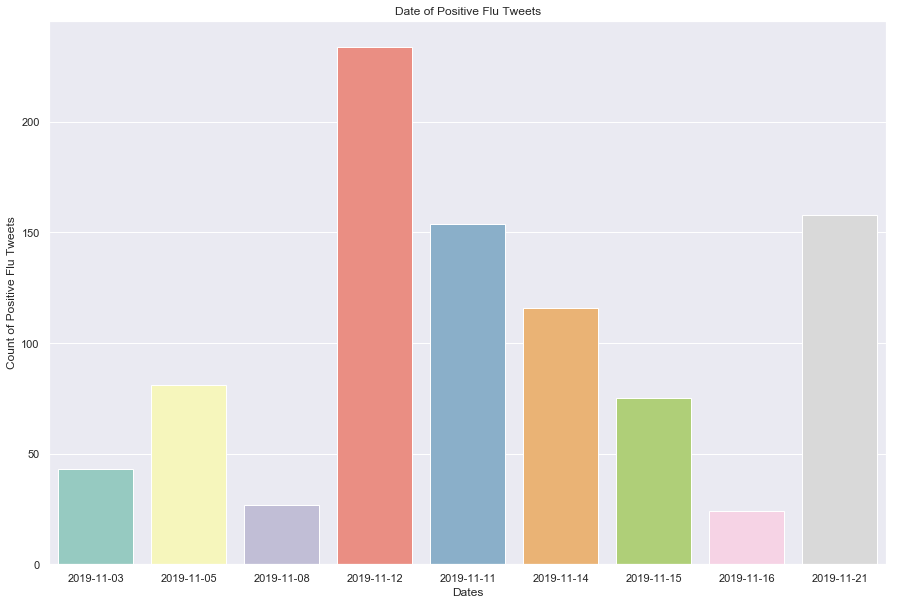

In [11]:
date= all.loc[all.label==1].date
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.countplot(date, palette="Set3")
plt.xlabel('Dates')
plt.ylabel('Count of Positive Flu Tweets')
plt.title('Date of Positive Flu Tweets')
plt.show()

# Data Cleaning and Feature Engineering

### Tweets have many miscellaneous characters and are prone to having slang and erroneous terms. We will try to clean this data as best as we can before we use it for modeling. 

In [12]:
#Creating dataframe that just focuses on 'Text' and 'Label'. 
new= pd.DataFrame(all[['text', 'label']])

In [13]:
new = new.sample(frac=1).reset_index(drop=True)

In [14]:
new.head(10)

,text,label
0,Said the same thing üòÇüòÇüòÇ,0
1,RT @YYSepsis: @KarnCliffe &amp; I just had a l...,0
2,y’all be getting the flu??? I’ve never had tha...,0
3,This guy is a cancer,0
4,Missed all of you! xoxoxoxox❤️\n\nI'm soon to ...,1
5,I REBUKE THE FLU IN THE NAME OF JESUS!! 😩,0
6,RT @ech0astral: swine flu was really running s...,0
7,Btw I took this pic when I was sick with the f...,0
8,so my new med causes flu like symptoms and ext...,0
9,What you need to know ahead of this year's flu...,0


### There's also some duplicates in there. We need to drop those. 

In [15]:
# While labeling, I've intentionally left some tweets blank to try to achieve a higher positive label.I'm dropping
# the blank tweets here

new.dropna(inplace=True)

In [16]:
print('Values before dropping duplicate tweets')
new.label.value_counts()

Values before dropping duplicate tweets


0    3552
1     912
Name: label, dtype: int64

In [17]:
# because there were so many tweets that are Retweeets or the same tweets over and over again in the feeds,
# I've had to drop it here. 
new.drop_duplicates(inplace=True)

In [18]:
new

,text,label
0,Said the same thing üòÇüòÇüòÇ,0
1,RT @YYSepsis: @KarnCliffe &amp; I just had a l...,0
2,y’all be getting the flu??? I’ve never had tha...,0
3,This guy is a cancer,0
4,Missed all of you! xoxoxoxox❤️\n\nI'm soon to ...,1
...,...,...
4460,@senatemajldr https://t.co/6Aj7Cn0uXo,0
4461,Yh this flu cold whatever it is can doooooo on...,0
4462,RT @Dante_Colle: Good Morning everyone! üòä @...,0
4463,RT @cafe_health: Please do not get a flu shot ...,0


In [19]:
print('Values after dropping duplicate tweets')
new.label.value_counts()

Values after dropping duplicate tweets


0    3427
1     896
Name: label, dtype: int64

### Creating functions to clean tweets and add new columns as we clean and process.

In [20]:
#removing URLs and string beginning with @ 
def remove_mentionsURLs(text):
    tweet_out= re.sub(r'@[A-Za-z0-9]+', '', text)
    tweet_out=re.sub(r'http\S+', '', tweet_out)
    tweet_out= re.sub(r'RT @[\w_]+:', '', tweet_out)
    return tweet_out

new['text_noURLs'] = new['text'].apply(lambda x: remove_mentionsURLs(x))

In [21]:
#removing punctuations from the text
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

new['text_punct'] = new['text_noURLs'].apply(lambda x: remove_punct(x))

In [22]:
# remove words with 2 or less characters
def remove_RT(text):
    text= re.sub(r'\b\w{1,2}\b', '', text)
    return text

new['text_removeRT'] = new['text_punct'].apply(lambda x: remove_RT(x))

In [23]:
#tokenzing into words 
def tokenization(text):
    text = re.split('\W+', text)
    return text

new['tokenized'] = new['text_removeRT'].apply(lambda x: tokenization(x.lower()))

In [24]:
#removing stop words
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
new['nonstop'] = new['tokenized'].apply(lambda x: remove_stopwords(x))

In [25]:
# lemmatizing
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

new['Tweet_lemmatized'] = new['nonstop'].apply(lambda x: lemmatizer(x))

In [26]:
#stemming
from nltk.stem import PorterStemmer 
port_stemmer= nltk.PorterStemmer()

def stemming(text):
    #stripped = [word.lower() for word in text if word.lower() not in stopwords]
    out_text= [port_stemmer.stem(word) for word in text]
    return out_text

new['stemmed']= new['nonstop'].apply(lambda x: stemming(x))

In [27]:
#Let's check to see how many unique words in lemmatized and stemmed words

word_count_lemma= list(itertools.chain.from_iterable(new['Tweet_lemmatized']))
word_count_stem= list(itertools.chain.from_iterable(new['stemmed']))

print('Unique words in lemmatized text:' +str(len(set(word_count_lemma))));
print('Unique words in stemmed text:' +str(len(set(word_count_stem))));

Unique words in lemmatized text:6937
Unique words in stemmed text:5975


In [28]:
# this removes less frequent words, leaving ONLY frequent words, or common words. Sometimes, less occuring words do 
#not have any value, or less value. 
flat_list= list(itertools.chain.from_iterable(new['stemmed']))
fd= nltk.FreqDist(flat_list)

keep_words= list(filter(lambda x: 2500>x[1]>3, fd.items()))
keep_words_list= [item[0] for item in keep_words]

def remove_lessfreq(tokanized_tweets):
    text_out= [word for word in tokanized_tweets if word in keep_words_list]
    return text_out
#removing less frequent words that are stemmed
new['remove_less_freq']= new['stemmed'].apply(lambda x: remove_lessfreq(x))
#removing less frequent words that are stemmed
new['remove_less_freq_lemma']= new['Tweet_lemmatized'].apply(lambda x: remove_lessfreq(x))

In [29]:
print(keep_words_list[0:10])

['said', 'thing', 'üòç', 'amp', 'love', 'even', 'discuss', 'member', 'lot', 'question']


In [30]:
# joining words back for modeling
def join_tokens(tokens):
    documents= " ".join([word for word in tokens if not word.isdigit()])
    return documents
#this one is from stemmed words with common words
new['document']= new['remove_less_freq'].apply(lambda x: join_tokens(x))

In [31]:
def join_tokens(tokens):
    documents= " ".join([word for word in tokens if not word.isdigit()])
    return documents
#this one is lemma words 
new['document_lemma']= new['Tweet_lemmatized'].apply(lambda x: join_tokens(x))

In [32]:
def join_tokens(tokens):
    documents= " ".join([word for word in tokens if not word.isdigit()])
    return documents

new['document_stemmed']= new['stemmed'].apply(lambda x: join_tokens(x))

### Comparing what stemmed words looks like without removing less frequent words, 

In [33]:
#comparing what stemmed words looks like without removing less frequent words
print(new['document_stemmed'])             

0                                  said thing üòç üòç üòç
1        amp love even discuss sepsi amp flu member lo...
2                                     get flu never shit 
3                                              guy cancer
4       miss xoxoxoxox soon back bout flu turn pneumonia 
                              ...                        
4460                                                     
4461                  flu cold whatev doooooo one üëã üèº
4462     coll good morn everyon üòä delray interview r...
4463     health pleas get flu shot peopl complet ineff...
4464                                       visual beyond 
Name: document_stemmed, Length: 4323, dtype: object


In [34]:
#stemmed words removing less 
print(new['document']) 

0                                  said thing üòç üòç üòç
1       amp love even discuss amp member lot question ...
2                                          get never shit
3                                              guy cancer
4                      miss soon back bout turn pneumonia
                              ...                        
4460                                                     
4461                                  cold whatev one üèº
4462    good morn everyon üòä interview realli proud l...
4463    health pleas get shot peopl complet year young...
4464                                                     
Name: document, Length: 4323, dtype: object


In [35]:
#using a unique set of words for out vocabulary for BOW modeling
list_unique= set(list(itertools.chain.from_iterable(new['remove_less_freq'])))
print (list_unique)

{'dead', 'know', 'nutrit', 'stomach', 'island', 'jordan', 'els', 'guess', 'live', 'äôve', 'give', 'small', 'üèº', 'inject', 'contract', 'product', 'sit', 'place', 'noon', 'laugh', 'colleagu', 'nap', 'yesterday', 'heart', 'close', 'wit', 'pretti', 'fast', 'line', 'internet', 'fuck', 'retweet', 'deliveri', 'price', 'yay', 'nasal', 'green', 'wouldnt', 'good', 'lmao', 'across', 'medicin', 'sometim', 'send', 'annoy', 'chest', 'immun', 'confid', 'hard', 'pull', 'short', 'receiv', 'needl', 'guarante', 'left', 'üôå', 'cost', 'bacteria', 'annual', 'anti', 'antivaxx', 'truth', 'cassandra', 'thought', 'confirm', 'social', 'tri', 'tool', 'make', 'encourag', 'articl', 'prevent', 'care', 'cross', 'often', 'way', 'shoot', 'camp', 'hr', 'mix', 'ticket', 'okay', 'afternoon', 'selfish', 'ultra', 'amp', 'influenza', 'wish', 'beep', 'egg', 'told', 'fri', 'confus', 'gym', 'servic', 'explain', 'freez', 'fill', 'florida', 'possibl', 'regret', 'physic', 'everybodi', 'flucold', 'busi', 'publicli', 'worri', 'to

In [36]:
new.to_csv('data/cleaned_tweets.csv')

In [37]:
# 1 final look at data.
new.head()

,text,label,text_noURLs,text_punct,text_removeRT,tokenized,nonstop,Tweet_lemmatized,stemmed,remove_less_freq,remove_less_freq_lemma,document,document_lemma,document_stemmed
0,Said the same thing üòÇüòÇüòÇ,0,Said the same thing üòÇüòÇüòÇ,Said the same thing üòÇüòÇüòÇ,Said the same thing üòÇüòÇüòÇ,"[said, the, same, thing, üòç, üòç, üòç]","[said, thing, üòç, üòç, üòç]","[said, thing, üòç, üòç, üòç]","[said, thing, üòç, üòç, üòç]","[said, thing, üòç, üòç, üòç]","[said, thing, üòç, üòç, üòç]",said thing üòç üòç üòç,said thing üòç üòç üòç,said thing üòç üòç üòç
1,RT @YYSepsis: @KarnCliffe &amp; I just had a l...,0,RT : &amp; I just had a lovely evening discu...,RT amp I just had a lovely evening discussi...,amp just had lovely evening discussing s...,"[, amp, just, had, lovely, evening, discussing...","[, amp, lovely, evening, discussing, sepsis, a...","[, amp, lovely, evening, discussing, sepsis, a...","[, amp, love, even, discuss, sepsi, amp, flu, ...","[amp, love, even, discuss, amp, member, lot, q...","[amp, amp, member, lot, question, amp]",amp love even discuss amp member lot question ...,amp lovely evening discussing sepsis amp flu ...,amp love even discuss sepsi amp flu member lo...
2,y’all be getting the flu??? I’ve never had tha...,0,y’all be getting the flu??? I’ve never had tha...,y’all be getting the flu I’ve never had that s...,’all getting the flu ’ never had that shit be...,"[, all, getting, the, flu, never, had, that, s...","[, getting, flu, never, shit, ]","[, getting, flu, never, shit, ]","[, get, flu, never, shit, ]","[get, never, shit]","[never, shit]",get never shit,getting flu never shit,get flu never shit
3,This guy is a cancer,0,This guy is a cancer,This guy is a cancer,This guy cancer,"[this, guy, cancer]","[guy, cancer]","[guy, cancer]","[guy, cancer]","[guy, cancer]","[guy, cancer]",guy cancer,guy cancer,guy cancer
4,Missed all of you! xoxoxoxox❤️\n\nI'm soon to ...,1,Missed all of you! xoxoxoxox❤️\n\nI'm soon to ...,Missed all of you xoxoxoxox❤️\n\nIm soon to be...,Missed all you xoxoxoxox❤️\n\n soon back H...,"[missed, all, you, xoxoxoxox, soon, back, had,...","[missed, xoxoxoxox, soon, back, bout, flu, tur...","[missed, xoxoxoxox, soon, back, bout, flu, tur...","[miss, xoxoxoxox, soon, back, bout, flu, turn,...","[miss, soon, back, bout, turn, pneumonia]","[soon, back, bout, pneumonia]",miss soon back bout turn pneumonia,missed xoxoxoxox soon back bout flu turned pne...,miss xoxoxoxox soon back bout flu turn pneumonia


# I want to visualize the top 20 ngrams for the tweets we've collected. N-grams using the CountVectorizer helps us create bigrams and trigrams. A bigram makes a prediction for a word based on the one before, and a trigram makes a prediction for the word based on the two words before. We will use these features later on.

flu 3351
shot 873
got 422
like 306
sick 260
cold 258
getting 231
day 216
year 212
season 210
vaccine 204
time 178
today 175
people 169
week 155
know 144
feel 139
amp 136
work 120
think 115


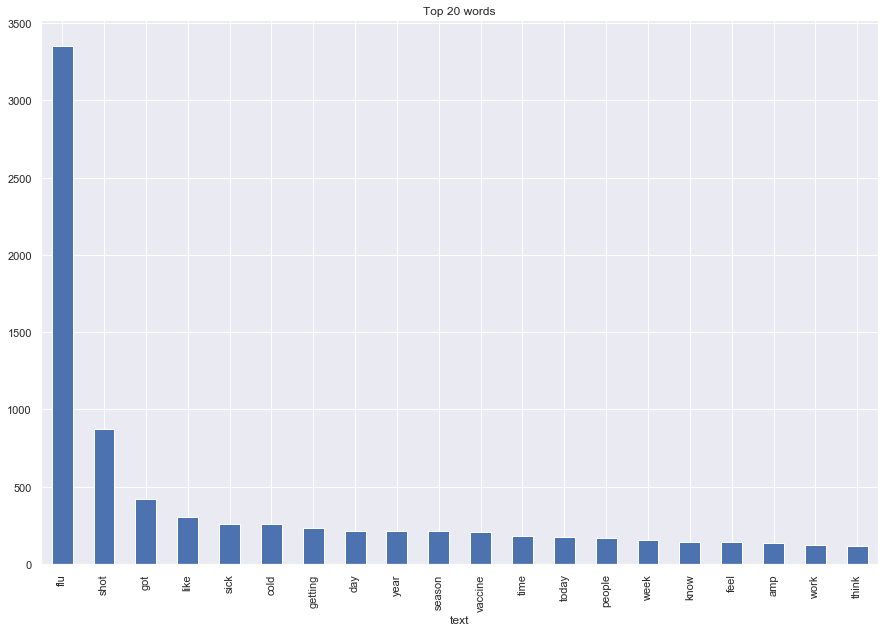

In [38]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#note here that I'm using the lemmatized document since that is what I've use with my best 
common_words = get_top_n_words(new['document_lemma'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words')
plt.show()

flu shot 819
got flu 242
flu season 172
getting flu 145
flu vaccine 124
cold flu 100
stomach flu 68
flu jab 65
feel like 55
like flu 42
free flu 39
amp flu 35
sick flu 34
shot today 32
swine flu 31
flu like 31
flu game 29
cold amp 26
year flu 25
man flu 25


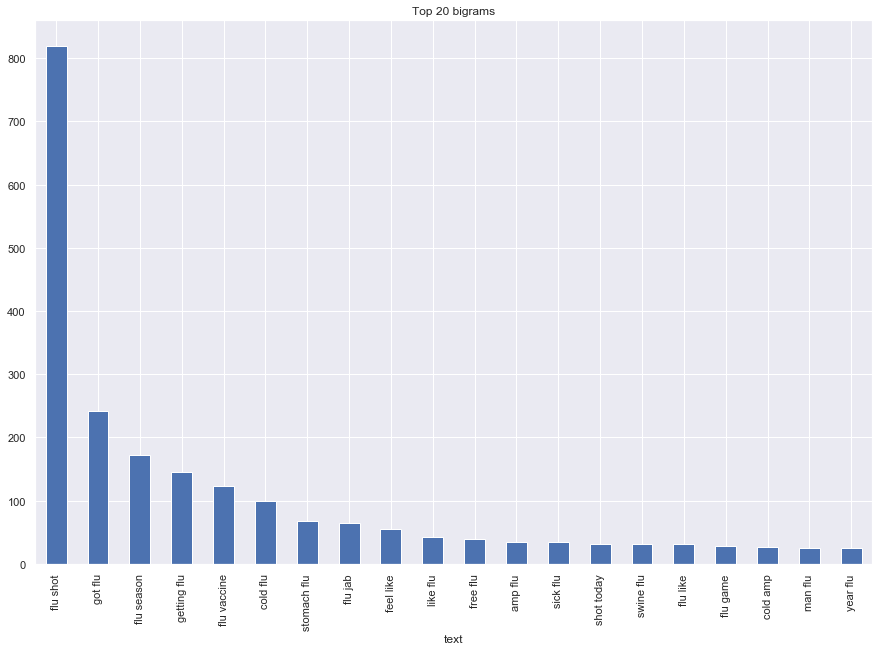

In [39]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english', ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(new['document_lemma'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams')
plt.show()

got flu shot 122
getting flu shot 79
flu shot today 32
cold flu season 26
cold amp flu 26
flu shot year 20
free flu shot 17
flu shot flu 16
gotten flu shot 13
flu shot clinic 13
flu nearly killed 12
nearly killed winter 12
flu shot protect 12
flu like symptom 11
feel like flu 11
fried chicken flu 11
flu shot got 11
border patrol refusing 10
patrol refusing let 10
refusing let doctor 10


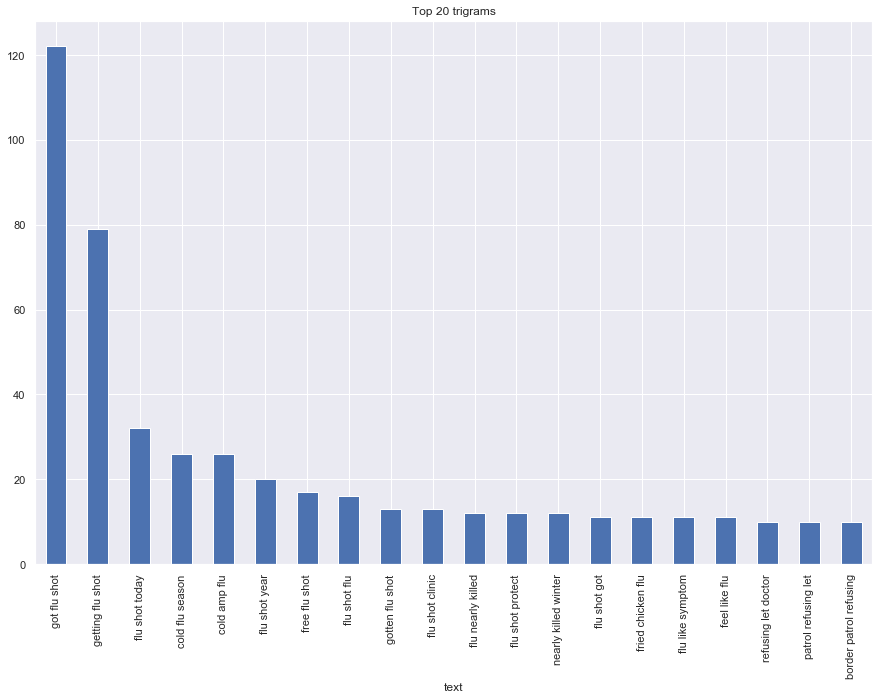

In [40]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english', ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(new['document_lemma'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
plt.figure(figsize=(15,10))
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams')
plt.show()

# Defining our bag of words

### Using bag of words with our unique list of words and trying out lemmatized ,stemmed documents. Let's see which ones will get better scores. 

In [41]:
from sklearn.feature_extraction import text
#extended punctuation list
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
#stopwords_en = stopwords.words('english')

#create a bag of words using CountVectorizer.
vectorizer = CountVectorizer(vocabulary=list_unique,#max_features=2000,
                                min_df=10, 
                             stop_words=stop_words,
                             #tokenizer='callable',
                             ngram_range=(1, 1),
                            strip_accents='ascii')
#remember "document is from stemmed words"
X = vectorizer.fit_transform(new['document'])
#extracting features 
columns = list(vectorizer.get_feature_names())
print('There are {} features'.format(len(columns)))
print(columns[0:20])

# Convert bag of words to a dataframe
count_vectordf = pd.DataFrame(X.toarray(), columns=columns)
count_vectordf.head()

There are 1395 features
['abl', 'absolut', 'accept', 'accord', 'account', 'ach', 'across', 'act', 'action', 'activ', 'actual', 'acut', 'ad', 'add', 'adem', 'admin', 'administ', 'administr', 'admit', 'adult']


,abl,absolut,accept,accord,account,ach,across,act,action,activ,...,üíø,üòä,üòå,üòç,üòé,üòí,üòî,üòû,üôå,üôé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(count_vectordf, new['label'], test_size=0.20, random_state=42)

# Logistic Regression with BOW



In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=0)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_train = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       692
           1       0.44      0.80      0.57       173

    accuracy                           0.76       865
   macro avg       0.69      0.77      0.70       865
weighted avg       0.84      0.76      0.78       865

AUC score: 0.7745664739884393
Classification accuracy is:  0.7572254335260116


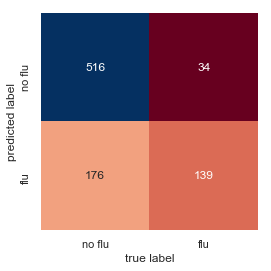

In [44]:
y_pred = logreg_train.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


## Random Forest with BOW

In [45]:
n_estimators = [100]
max_depth = [5, 8]
min_samples_split = [2, 3]
min_samples_leaf = [1, 2] 
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfc, param_grid, scoring='roc_auc', cv=5)
random_forest = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.66      0.78       692
           1       0.39      0.88      0.54       173

    accuracy                           0.70       865
   macro avg       0.67      0.77      0.66       865
weighted avg       0.84      0.70      0.73       865

AUC score: 0.7695086705202312
Classification accuracy is:  0.7040462427745665


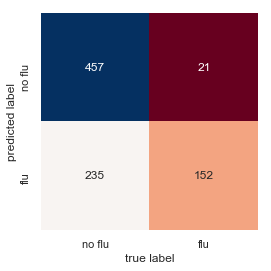

In [46]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 1066 (0.0823) shot
2. feature 1265 (0.0286) vaccin
3. feature 1037 (0.0214) season
4. feature 443 (0.0180) feel
5. feature 533 (0.0167) got
6. feature 876 (0.0147) peopl
7. feature 298 (0.0105) day
8. feature 117 (0.0080) bed
9. feature 1072 (0.0075) sick
10. feature 226 (0.0074) cold
11. feature 1149 (0.0073) suck
12. feature 1198 (0.0071) think
13. feature 698 (0.0070) like
14. feature 1132 (0.0067) stomach
15. feature 643 (0.0062) jab
16. feature 499 (0.0062) fuck
17. feature 1355 (0.0058) year
18. feature 1304 (0.0054) week
19. feature 592 (0.0052) hope
20. feature 970 (0.0050) realli


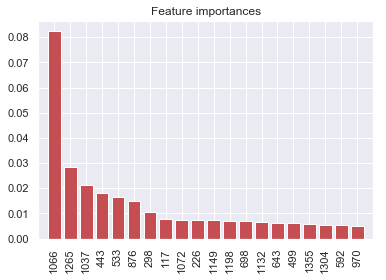

In [47]:
#have to fit without Gridsearch to get feature importances
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

terms = vectorizer.get_feature_names()

for f in range(20):
    print('{}. feature {} ({:.4f}) {}'.format((f+1), indices[f], importances[indices[f]], terms[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), indices, rotation=90)
plt.xlim([-1, 20])
plt.show()

# Naive Bayes with BOW

In [48]:
naive_bayes = MultinomialNB()
param_grid = {'alpha':[1, 1e-1, 1e-2] }

grid = GridSearchCV(naive_bayes, param_grid, scoring='roc_auc', cv=5)
nb = grid.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       692
           1       0.57      0.54      0.55       173

    accuracy                           0.83       865
   macro avg       0.73      0.72      0.72       865
weighted avg       0.82      0.83      0.82       865

AUC score: 0.7174855491329479
Classification accuracy is:  0.8254335260115607


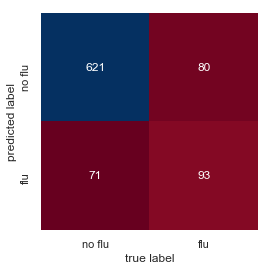

In [49]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


# Not bad for our a small dataset. But there's more things to try. This time we'll take our lemmatized words and see if it improves scores

In [50]:
cv=CountVectorizer(strip_accents='ascii')

count_vector=cv.fit_transform(new['document_lemma'])
count_vectordf= pd.DataFrame(count_vector.toarray())
count_vectordf.columns= cv.get_feature_names()
X_train, X_test, y_train, y_test = train_test_split(count_vectordf, new['label'], test_size=0.20, random_state=42)

## Logistic Regression with BOW Lemma

In [51]:
logreg = LogisticRegression(class_weight='balanced', solver= 'liblinear', random_state=0)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_train = grid.fit(X_train, y_train)

In [52]:
print(grid.best_params_)

{'C': 1}


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       692
           1       0.59      0.83      0.69       173

    accuracy                           0.85       865
   macro avg       0.77      0.84      0.79       865
weighted avg       0.88      0.85      0.86       865

AUC score: 0.8424855491329479
Classification accuracy is:  0.8485549132947977


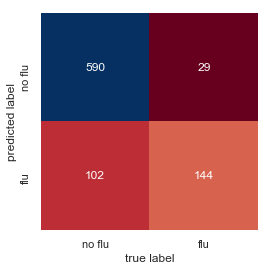

In [53]:
y_pred = logreg_train.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


## Random Forest with BOW Lemma

In [54]:
n_estimators = [100, 200]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfc, param_grid, scoring='roc_auc', cv=5)
random_forest = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       692
           1       0.55      0.87      0.67       173

    accuracy                           0.83       865
   macro avg       0.75      0.85      0.78       865
weighted avg       0.88      0.83      0.84       865

AUC score: 0.8453757225433526
Classification accuracy is:  0.8289017341040462


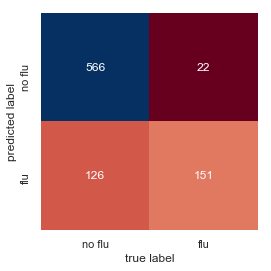

In [55]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 2241 (0.1081) flu
2. feature 5388 (0.0571) shot
3. feature 6437 (0.0141) vaccine
4. feature 5263 (0.0137) season
5. feature 2470 (0.0127) get
6. feature 2543 (0.0097) got
7. feature 2136 (0.0074) feel
8. feature 1467 (0.0064) day
9. feature 5416 (0.0063) sick
10. feature 4413 (0.0062) people
11. feature 599 (0.0061) better
12. feature 558 (0.0053) bed
13. feature 1104 (0.0053) cold
14. feature 6824 (0.0051) year
15. feature 6048 (0.0048) think
16. feature 2359 (0.0048) free
17. feature 5730 (0.0047) stomach
18. feature 3149 (0.0047) ive
19. feature 2473 (0.0047) getting
20. feature 3460 (0.0047) like


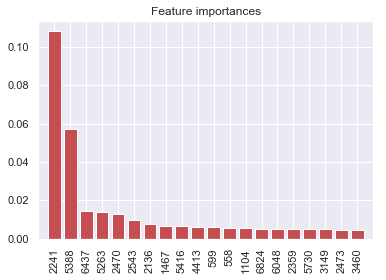

In [56]:
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

terms = cv.get_feature_names()

for f in range(20):
    print('{}. feature {} ({:.4f}) {}'.format((f+1), indices[f], importances[indices[f]], terms[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), indices, rotation=90)
plt.xlim([-1, 20])
plt.show()

# Naive Bayes with BOW Lemma

In [57]:
naive_bayes = MultinomialNB()
param_grid = {'alpha':[1, 1e-1, 1e-2] }

grid = GridSearchCV(naive_bayes, param_grid, scoring='roc_auc', cv=5)
nb = grid.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.91      0.81      0.85       692
           1       0.46      0.67      0.55       173

    accuracy                           0.78       865
   macro avg       0.69      0.74      0.70       865
weighted avg       0.82      0.78      0.79       865

AUC score: 0.7384393063583814
Classification accuracy is:  0.7791907514450868


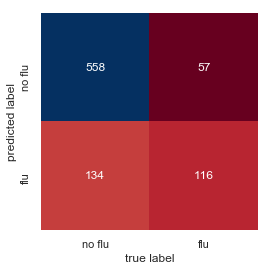

In [58]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


## Logistic Regression with Lemmatized document and BOW gave us the best scores. I want to fine tune it to see if we can improve these scores a little more. 

In [59]:
cv=CountVectorizer(strip_accents='ascii')

count_vector=cv.fit_transform(new['document_lemma'])
count_vectordf= pd.DataFrame(count_vector.toarray())
count_vectordf.columns= cv.get_feature_names()
X_train, X_test, y_train, y_test = train_test_split(count_vectordf, new['label'], test_size=0.20, random_state=42)

In [60]:
logreg = LogisticRegression( solver ='liblinear', class_weight='balanced', random_state=0)


param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2'],
              'max_iter': [100, 200, 250, 500]}




grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_train = grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


              precision    recall  f1-score   support

           0       0.95      0.85      0.90       692
           1       0.59      0.83      0.69       173

    accuracy                           0.85       865
   macro avg       0.77      0.84      0.79       865
weighted avg       0.88      0.85      0.86       865

AUC score: 0.8424855491329479
Classification accuracy is:  0.8485549132947977


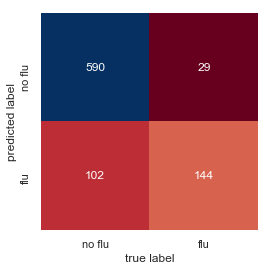

In [61]:
y_pred = logreg_train.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


# Using TF-IDF

In [62]:
# Split original into train and test, used to look at text later
from sklearn.feature_extraction import text
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%", 'pron']
stop_words = text.ENGLISH_STOP_WORDS.union(punc)


X_train, X_test, y_train, y_test = train_test_split(new['document_lemma'], 
                                                    new['label'], 
                                                    test_size=0.25, 
                                                    random_state=0)

#creating our Tf_idf vectorizer
vectorizer_tfidf = TfidfVectorizer(#vocabulary= list_unique,
    max_features= 1000, # drop words that occur in more than this % of paragraphs
                             #min_df=1# only use words that appear at least 10 times
                             stop_words=stop_words, 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True ,#Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            strip_accents= 'ascii')


# Fit and transform training data set, only transform test
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

print("Number of features: %d" % X_train_tfidf.get_shape()[1])

Number of features: 1000


## Random Forest Tf-IDF

In [63]:
n_estimators = [100, 200]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfc, param_grid, scoring='roc_auc', cv=5)
random_forest = grid.fit(X_train_tfidf, y_train)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       848
           1       0.50      0.89      0.64       233

    accuracy                           0.78      1081
   macro avg       0.73      0.82      0.74      1081
weighted avg       0.86      0.78      0.80      1081

AUC score: 0.8209748765082193
Classification accuracy is:  0.782608695652174


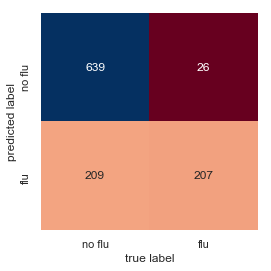

In [64]:
y_pred = random_forest.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 308 (0.1533) flu
2. feature 749 (0.0818) shot
3. feature 729 (0.0181) season
4. feature 926 (0.0178) vaccine
5. feature 356 (0.0177) got
6. feature 956 (0.0166) week
7. feature 190 (0.0163) day
8. feature 293 (0.0132) feel
9. feature 67 (0.0100) bed
10. feature 142 (0.0092) cold
11. feature 859 (0.0087) think
12. feature 447 (0.0076) ive
13. feature 611 (0.0075) people
14. feature 487 (0.0074) like
15. feature 800 (0.0074) stomach
16. feature 59 (0.0072) bad
17. feature 344 (0.0071) getting
18. feature 297 (0.0070) fever
19. feature 752 (0.0069) sick
20. feature 23 (0.0069) amp


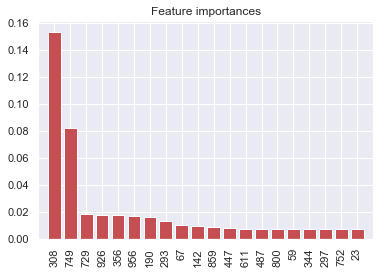

In [65]:
rfc.fit(X_train_tfidf, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

terms = vectorizer_tfidf.get_feature_names()

for f in range(20):
    print('{}. feature {} ({:.4f}) {}'.format((f+1), indices[f], importances[indices[f]], terms[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), indices, rotation=90)
plt.xlim([-1, 20])
plt.show()

## Logistic Regression with TF-IDF

In [66]:
logreg = LogisticRegression(class_weight='balanced', solver= 'liblinear', random_state=0)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_train = grid.fit(X_train_tfidf, y_train)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       848
           1       0.57      0.80      0.67       233

    accuracy                           0.83      1081
   macro avg       0.75      0.82      0.77      1081
weighted avg       0.86      0.83      0.84      1081

AUC score: 0.8165944610899668
Classification accuracy is:  0.8270120259019427


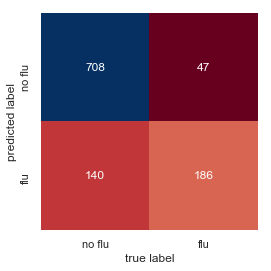

In [67]:
y_pred = logreg_train.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


## Naive Bayes with TF-IDF

In [68]:
naive_bayes = MultinomialNB()
param_grid = {'alpha':[1, 1e-1, 1e-2] }

grid = GridSearchCV(naive_bayes, param_grid, scoring='roc_auc', cv=5)
nb = grid.fit(X_train_tfidf, y_train)


              precision    recall  f1-score   support

           0       0.83      0.96      0.89       848
           1       0.66      0.27      0.38       233

    accuracy                           0.81      1081
   macro avg       0.75      0.62      0.64      1081
weighted avg       0.79      0.81      0.78      1081

AUC score: 0.6163252085189084
Classification accuracy is:  0.81313598519889


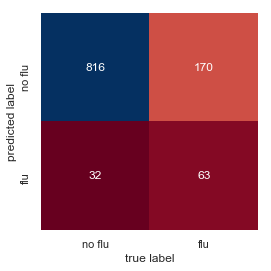

In [69]:
y_pred = nb.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

# Bigrams

In [70]:
# Using bigrams 
cv=CountVectorizer(ngram_range=(2, 2))
count_vector= cv.fit_transform(new['document_lemma'])
count_vectordf= pd.DataFrame(count_vector.toarray())
count_vectordf.columns= cv.get_feature_names()

In [71]:
X= count_vectordf
X_train, X_test, y_train, y_test = train_test_split(X, new['label'], test_size=0.20, random_state=42)

## Random Forest with Bigrams

In [72]:
n_estimators = [100, 200]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfc, param_grid, scoring='roc_auc', cv=5)
random_forest = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       692
           1       0.70      0.40      0.51       173

    accuracy                           0.85       865
   macro avg       0.78      0.68      0.71       865
weighted avg       0.83      0.85      0.83       865

AUC score: 0.6806358381502892
Classification accuracy is:  0.846242774566474


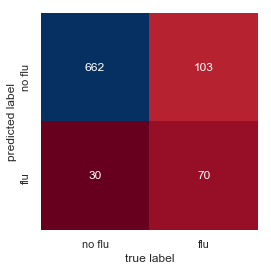

In [73]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 6861 (0.0546) flu shot
2. feature 8279 (0.0136) got flu
3. feature 6841 (0.0132) flu season
4. feature 7012 (0.0122) flu vaccine
5. feature 5943 (0.0069) feel like
6. feature 7732 (0.0059) get flu
7. feature 17140 (0.0057) sick flu
8. feature 19103 (0.0055) think flu
9. feature 6924 (0.0050) flu suck
10. feature 7469 (0.0049) fuck flu
11. feature 18077 (0.0047) stomach flu
12. feature 7868 (0.0046) getting flu
13. feature 2592 (0.0046) caught flu
14. feature 7633 (0.0042) gave flu
15. feature 9233 (0.0039) home flu
16. feature 3914 (0.0039) damn flu
17. feature 19466 (0.0037) today flu
18. feature 6907 (0.0035) flu still
19. feature 6432 (0.0033) flu day
20. feature 2200 (0.0033) bruh flu


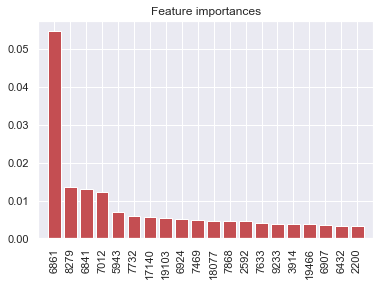

In [74]:
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

terms = cv.get_feature_names()

for f in range(20):
    print('{}. feature {} ({:.4f}) {}'.format((f+1), indices[f], importances[indices[f]], terms[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), indices, rotation=90)
plt.xlim([-1, 20])
plt.show()

## Logistic Regression with Bigrams

In [75]:
logreg = LogisticRegression(class_weight='balanced', solver= 'liblinear', random_state=0)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_train = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       692
           1       0.64      0.55      0.59       173

    accuracy                           0.85       865
   macro avg       0.76      0.74      0.75       865
weighted avg       0.84      0.85      0.84       865

AUC score: 0.7377167630057803
Classification accuracy is:  0.8473988439306358


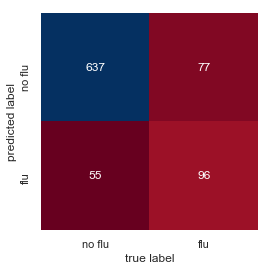

In [76]:
y_pred = logreg_train.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


## Naive Bayes with Bigrams

In [77]:
naive_bayes = MultinomialNB()
param_grid = {'alpha':[1, 1e-1, 1e-2] }

grid = GridSearchCV(naive_bayes, param_grid, scoring='roc_auc', cv=5)
nb = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       692
           1       0.34      0.71      0.46       173

    accuracy                           0.67       865
   macro avg       0.62      0.68      0.61       865
weighted avg       0.79      0.67      0.70       865

AUC score: 0.680635838150289
Classification accuracy is:  0.6658959537572254


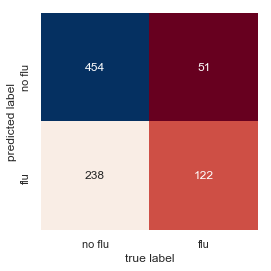

In [78]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

# Trigrams

In [79]:
#Trigrams
cv=CountVectorizer(ngram_range=(3, 3))
count_vector= cv.fit_transform(new['document_lemma'])
count_vectordf= pd.DataFrame(count_vector.toarray())
count_vectordf.columns= cv.get_feature_names()
X= count_vectordf
X_train, X_test, y_train, y_test = train_test_split(X, new['label'], test_size=0.20, random_state=42)

## Random Forest with Trigrams

In [80]:
n_estimators = [100, 200]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfc, param_grid, scoring='roc_auc', cv=5)
random_forest = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      0.22      0.36       692
           1       0.24      0.98      0.38       173

    accuracy                           0.37       865
   macro avg       0.61      0.60      0.37       865
weighted avg       0.83      0.37      0.36       865

AUC score: 0.6004335260115607
Classification accuracy is:  0.37109826589595374


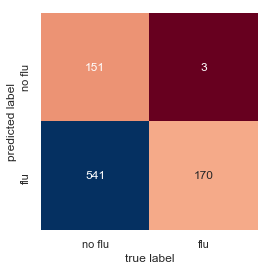

In [81]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 8783 (0.0171) get flu shot
2. feature 9524 (0.0078) got flu shot
3. feature 15865 (0.0050) pretty sure flu
4. feature 9011 (0.0050) getting flu shot
5. feature 22094 (0.0039) want weed flu
6. feature 14744 (0.0032) omg got flu
7. feature 5868 (0.0031) feel like flu
8. feature 20444 (0.0030) think catching flu
9. feature 9538 (0.0029) got flu tell
10. feature 17589 (0.0027) serious relationship flu
11. feature 1862 (0.0025) bloody flu keeping
12. feature 18539 (0.0025) sickening truly flu
13. feature 3526 (0.0024) cough flu sad
14. feature 706 (0.0024) annoyed flu mxm
15. feature 22028 (0.0023) wann take flu
16. feature 7113 (0.0023) flu really got
17. feature 16730 (0.0023) restingtrying get flu
18. feature 20458 (0.0023) think flu awesome
19. feature 20477 (0.0022) think got flu
20. feature 6626 (0.0022) flu fokin flu


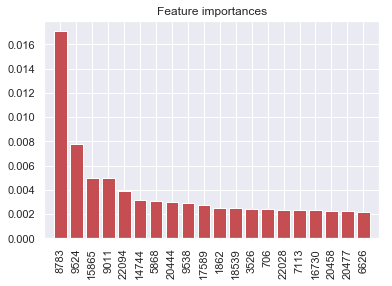

In [82]:
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

terms = cv.get_feature_names()

for f in range(20):
    print('{}. feature {} ({:.4f}) {}'.format((f+1), indices[f], importances[indices[f]], terms[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), indices, rotation=90)
plt.xlim([-1, 20])
plt.show()

## Logistic Regression with Trigrams

In [83]:
logreg = LogisticRegression(class_weight='balanced', solver= 'liblinear', random_state=0)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_train = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.82      0.98      0.90       692
           1       0.70      0.15      0.25       173

    accuracy                           0.82       865
   macro avg       0.76      0.57      0.57       865
weighted avg       0.80      0.82      0.77       865

AUC score: 0.5671965317919075
Classification accuracy is:  0.8173410404624277


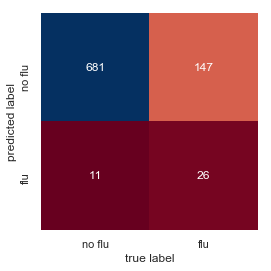

In [84]:
y_pred = logreg_train.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');


## Naive Bayes with Trigrams

In [85]:
naive_bayes = MultinomialNB()
param_grid = {'alpha':[1, 1e-1, 1e-2] }

grid = GridSearchCV(naive_bayes, param_grid, scoring='roc_auc', cv=5)
nb = grid.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.83      0.47      0.60       692
           1       0.23      0.61      0.33       173

    accuracy                           0.50       865
   macro avg       0.53      0.54      0.47       865
weighted avg       0.71      0.50      0.55       865

AUC score: 0.5426300578034682
Classification accuracy is:  0.500578034682081


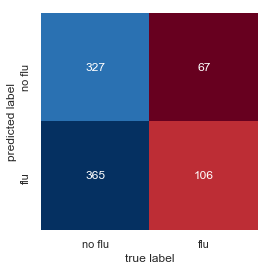

In [86]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))
print("Classification accuracy is: ", (mat[0][0] + mat[1][1]) / np.sum(mat))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap= 'RdBu', cbar=False,
            xticklabels=['no flu', 'flu'], yticklabels=['no flu', 'flu'])
plt.xlabel('true label')
plt.ylabel('predicted label');

# Conclusion for the project. (Supervised and Unsupervised)

1. Comparing all of the Supervised models I've used, the Logistic Regression with BOW and Lemmatized document gave us the best result. The BERT classifier we have used gave us a score 0.69% mcc. I would say that for ease of  use, BERT classifier wins. It is able to get a moderate score with tweets that do not have to be lemmatized or stemmed and with stop words present. Pytorch huggingface makes it almost too easy to just run a classifier with different models and minimal fine tuning. But Logistic Regression runs faster and we were able to get a good score with simple NLP techniques. It would be interesting to see the results on a larger dataset. 

2. Our Unsupervised models did not work so well. Clustering with k-means, LSA/SVD, and LDA failed to identify different topics or clusters.  Our dataset is too small and the variance or differences between the tweets are not made apparent.

# What we can do to improve and future applications.

1. I would like to see a larger dataset for this project. Ideally, we need tweets with geolocation so we can effectively track the positive flu by exact location. Given that only a small fraction of people share their geolocation with their tweets, it is even more rare to have geolocation plus flu positive tweets. Having a larger dataset and continuous streaming of tweets can possibly give us tweets that have geolocation. 

2. It's nice to have the tweets pertaining to positive flu but in reality, we will most likely need more "features" or parameters. An example would be to include incubation period of the disease, immunization rates, how the flu can infect and spread, and the viral strains present. These can possibly even help us predict the flu, before it even hits. 

3. If we can predict the flu, then is it possible to predict other epidemiological outbreaks in the world using twitter? What about Ebola? What about Measles? There's so much potential to advance disease surveillance using social media and machine learning. 